The idea is to use a downscaled version of dropout and then upsample it to have missing volumes instead of points.

I need to verify that the probability of zeros remains.

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
p = 0.3
f = 8
dropout = torch.nn.Dropout(p=p)
upsample = torch.nn.Upsample(scale_factor=f)

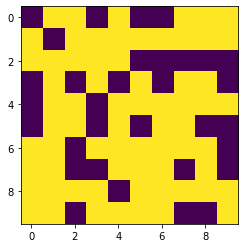

In [4]:
subtomo_length = 84
shape = np.array(3*[subtomo_length])//f
shape = tuple(shape)

dummy_tensor = torch.ones(shape)
bs_points = dropout(dummy_tensor)*(1-p)
plt.imshow(bs_points.numpy()[0])

In [5]:
bs_squares = upsample(bs_points.unsqueeze(0).unsqueeze(0))
bs_squares.shape

torch.Size([1, 1, 80, 80, 80])

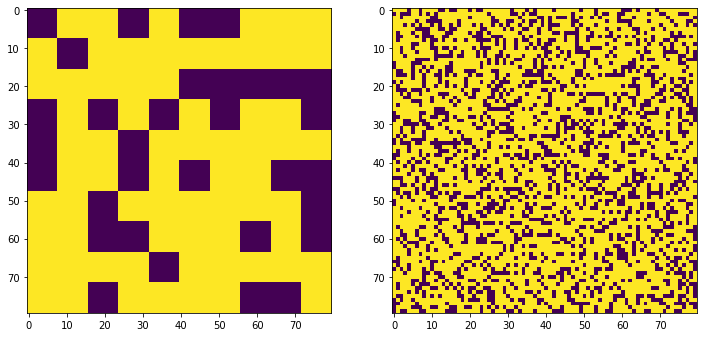

In [6]:
bs_squares = upsample(bs_points.unsqueeze(0).unsqueeze(0))
bs_squares = bs_squares.squeeze()

_bs_points = dropout(torch.ones_like(bs_squares))*(1-p)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 10))
ax0.imshow(bs_squares.numpy()[0])
ax1.imshow(_bs_points.numpy()[0])

In [7]:
_bs_points.sum()/torch.prod(torch.tensor(bs_squares.shape))

tensor(0.6998)

In [8]:
bs_squares.sum()/torch.prod(torch.tensor(bs_squares.shape))

tensor(0.6850)

In [88]:
n_samples = 5
aux = torch.stack([dropout(torch.ones(shape))*(1-p) for i in range(n_samples)], axis=0)
aux = aux.unsqueeze(0)
aux = upsample(aux).squeeze()
aux.shape

torch.Size([5, 96, 96, 96])

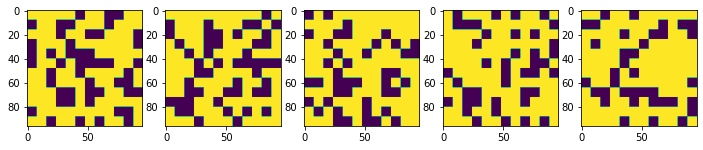

In [89]:
fig, ax = plt.subplots(1, n_samples, figsize=(12, 8))
for i, a in enumerate(ax):
    a.imshow(aux[i][0])

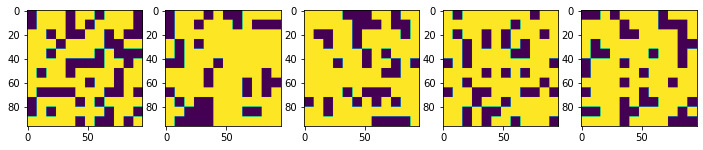

In [87]:
fig, ax = plt.subplots(1, n_samples, figsize=(12, 8))
for i, a in enumerate(ax):
    a.imshow(aux[i][0])